# Milk Production, Weather, and Animal Rankings

The following document is an initial inspection of data regarding, milk volumes, weather and animal ratings for a dairy farm in Central Pennslyvannia.

In [1]:
import sys
sys.path.insert(0, '../scripts')
sys.path.insert(0, '../data/database')
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
engine =  create_engine('sqlite:///../data/database/happycows.db')
with engine.connect() as con:
    milk_volumes = pd.read_sql_table('milk_volume', con)
    weather = pd.read_sql_table('weather', con)
    classification = pd.read_sql_table('classification', con)

### Question: What is the composition of the herd?

The classification system provides a final score (0-100) range.  By plotting the final scores from the classification data set we can see the distribution of animal scores in relation to the 'ideal' milking cow (i.e. score of 100).  The histogram below shows the majority of the cows scoring between 80 and 85 points. 

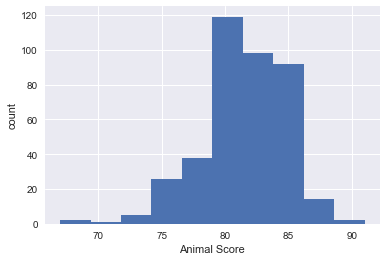

In [3]:
# Reindex to each cow and date combination
c = classification.set_index(['animal_id', 'date'])

sns.set()
plt.hist(c['final_score'].dropna())
plt.xlabel('Animal Score')
plt.ylabel('count')
plt.show()

### Question:  What is the distributon of milk production?

At the dairy farm in question, milkings occur twice daily.  Animals may not participate in both milkings in a given day, as a result rather than looking at a pounds-per-day metric, we can examine the distribution of milk weights below.  The following histogram shows that the majority of cows on this farm produced approximately between 10 and 20 pounds of milk per milking or between 1.2 and 2.5 gallons.

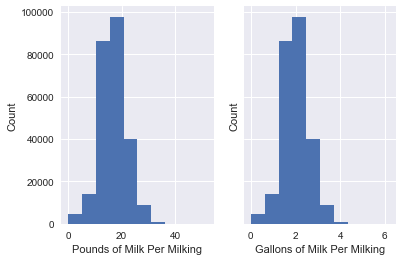

In [4]:
m = milk_volumes['milk_weight'].dropna()
g = m / 8.35 # The average gallon of milk weighs approximately 8.35 pounds 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(m)
ax1.set_xlabel('Pounds of Milk Per Milking')
ax1.set_ylabel('Count')

ax2.hist(g)
ax2.set_xlabel('Gallons of Milk Per Milking')
ax2.set_ylabel('Count')
plt.show()

### What is the temperature profile of the region?



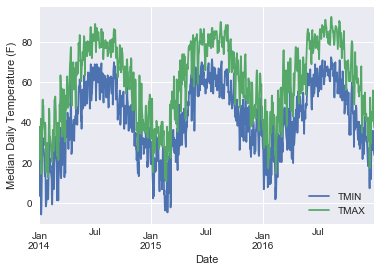

In [5]:
t = weather[['TMIN','TMAX', 'DATE']].groupby(weather['DATE']).median()
t.plot(kind='line')
plt.ylabel('Median Daily Temperature (F)')
plt.xlabel('Date')
plt.plot()
plt.show()

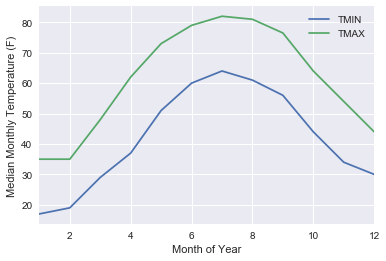

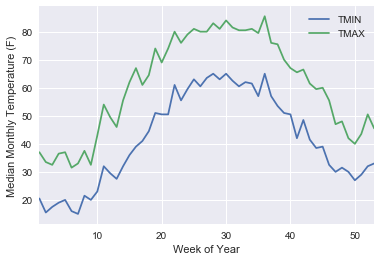

In [6]:
t_monthly = weather[['TMIN','TMAX', 'DATE']].groupby(weather['DATE'].dt.month).median()
t_monthly.plot(kind='line')
plt.ylabel('Median Monthly Temperature (F)')
plt.xlabel('Month of Year')
plt.plot()
plt.show()

t_weekly = weather[['TMIN','TMAX', 'DATE']].groupby(weather['DATE'].dt.week).median()
t_weekly.plot(kind='line')
plt.ylabel('Median Monthly Temperature (F)')
plt.xlabel('Week of Year')
plt.plot()
plt.show()

### Question: Does milk production vary seasonally?

- Plot all history
- Identify gap
- Plot median weekly

Yes there is seasonal variation

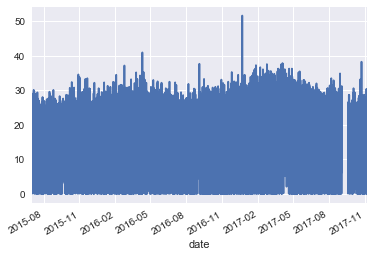

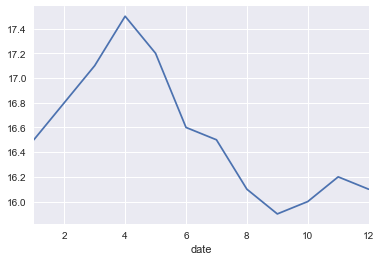

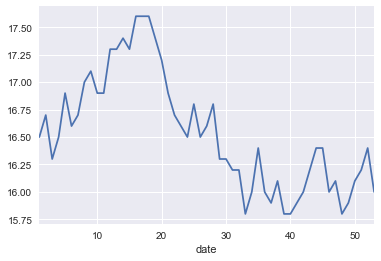

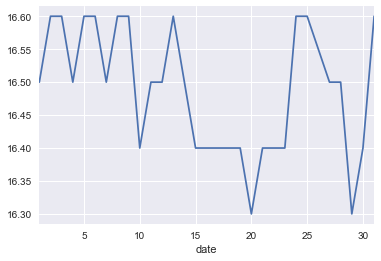

In [17]:
milk_volumes['milk_weight'].groupby(milk_volumes['date']).median().plot()
plt.show()
milk_volumes['milk_weight'].groupby(milk_volumes['date'].dt.month).median().plot()
plt.show()
milk_volumes['milk_weight'].groupby(milk_volumes['date'].dt.week).median().plot()
plt.show()
milk_volumes['milk_weight'].groupby(milk_volumes['date'].dt.day).median().plot()
plt.show()

### Question: Do do cows in different categories see the same levels of seasonal varation?